In [1]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Data directory
workdir = "data/dataset2"

In [65]:
# Initialize a 2D NumPy array for cleartexts
# Dimensions: 150 cleartexts x 16 bytes
cleartexts = np.zeros((150, 16), dtype=int)

# Read the cleartexts
with open(f"{workdir}/cleartext.txt", "r") as file:
    for i, line in enumerate(file):
        # Convert line to integer values and store in array
        cleartexts[i] = np.array(line.strip().split(), dtype=int)

In [66]:
print(f"cleartexts dimmensions: {cleartexts.shape}")
print(f"First line of trace0.txt: {cleartexts[0]}")

cleartexts dimmensions: (150, 16)
First line of trace0.txt: [135  11 211  69 167 231 179  68  34 206 119 212 102 210 145 177]


In [8]:
# Initialize a 3D NumPy array to hold all traces
# Dimensions: 16 key bytes x 150 traces x 50000 samples
all_traces = np.zeros((16, 150, 50000), dtype=float)

# Read the traces
for i in range(16):
    filename = f"{workdir}/trace{i}.txt"
    with open(filename, "r") as file:
        for j, line in enumerate(file):
            # Convert line to float values and store in array
            all_traces[i, j] = np.array(line.strip().split(), dtype=float)
    i += 1

In [68]:
print(f"all_traces dimmensions: {all_traces.shape}")
print(f"First line of trace0.txt: {all_traces[0][0]}")

all_traces dimmensions: (16, 150, 50000)
First line of trace0.txt: [0.1353 0.1235 0.1012 ... 0.1277 0.1234 0.1085]


In [10]:
# Dimensions: 16 key bytes x 150 traces x 50000 samples
all_clocks = np.zeros((16, 150, 50000), dtype=float)

# Read the traces
for i in range(16):
    filename = f"{workdir}/clock{i}.txt"
    with open(filename, "r") as file:
        for j, line in enumerate(file):
            # Convert line to float values and store in array
            all_clocks[i, j] = np.array(line.strip().split(), dtype=float)
    i += 1

In [70]:
print(f"all_clocks dimmensions: {all_clocks.shape}")
print(f"First line of clock0.txt: {all_clocks[0][0]}")

all_clocks dimmensions: (16, 150, 50000)
First line of clock0.txt: [ 0.9507  0.9245  0.9326 ... -0.0149 -0.0447 -0.0228]


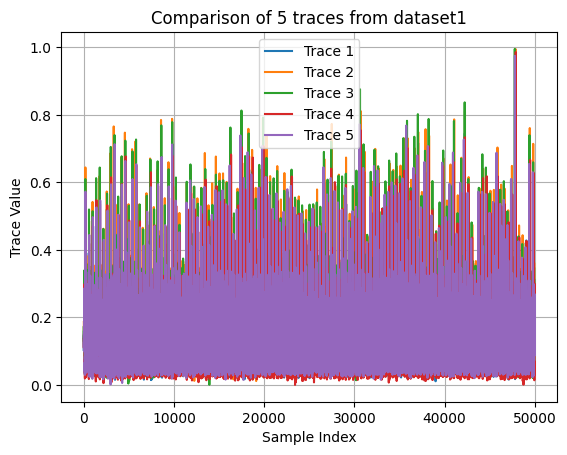

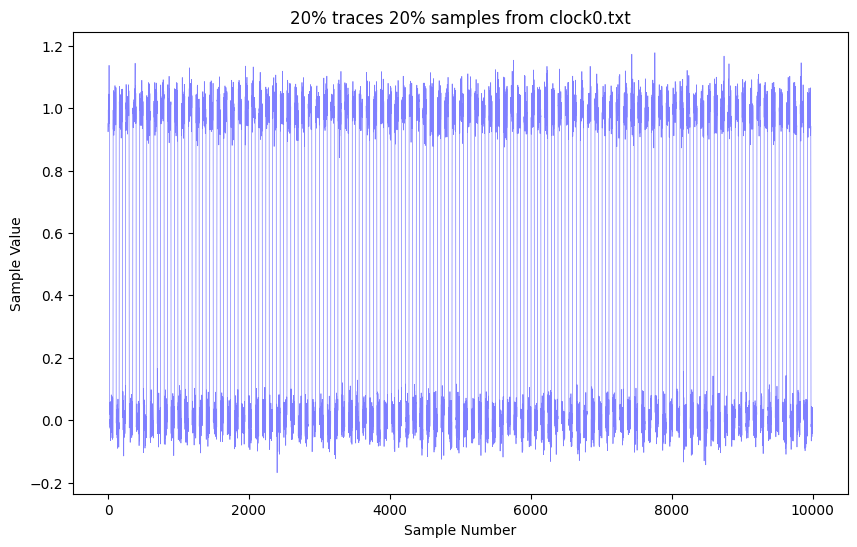

In [33]:
nb_traces = 5

for i, trace in enumerate(all_traces[0][:nb_traces]):
    plt.plot(trace, label=f"Trace {i + 1}")

plt.title(f"Comparison of {nb_traces} traces from dataset1")
plt.xlabel("Sample Index")
plt.ylabel("Trace Value")
plt.legend()
plt.grid(True)
plt.show()

# plot all traces of a specific key byte
key_byte_index = 0
plt.figure(figsize=(10, 6))
i=0
for trace in all_clocks[key_byte_index]:
    if i % 1000 == 0:
        plt.plot(trace[:10000], "b", linewidth=0.5, alpha=0.5)
    i+=1

plt.title(f"20% traces 20% samples from clock{key_byte_index}.txt")
plt.xlabel("Sample Number")
plt.ylabel("Sample Value")
plt.show()

In [72]:
sbox = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16]

model = []
for x in range(150):  # For all the cleartexts
    trace = []
    for y in range(256):  # For all the keys
        for z in range(16):  # For all the positions
            xor = (cleartexts[x][z]) ^ y
            HW = bin(sbox[xor]).count(
                "1"
            )  # SBOX + count the number of 1s (Hamming weight)
        trace.append(HW)
    model.append(trace)

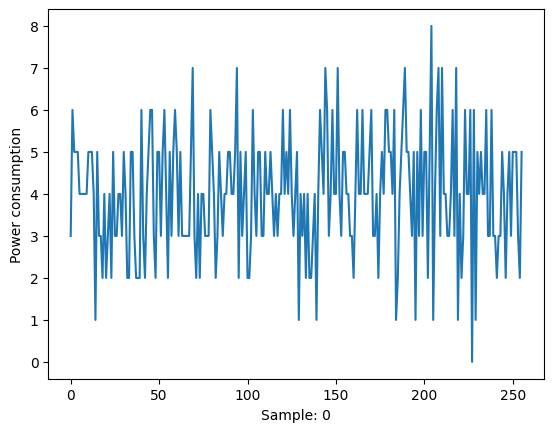

In [73]:
i = 0

plt.plot(model[i])
plt.xlabel(f'Sample: {i}')
plt.ylabel("Power consumption")
plt.show()

In [75]:
key = []
limit = 0.7  # We set 0.8 as the value that, once surpassed, it means that we are in a rising flank

for z in range(16):  # z is the byte of the key we are analyzing
    print(f'{z+1}/16')

    trace_byte = all_traces[z]
    clock_byte = all_clocks[z]
    trace_flank = []

    # detect rising flanks
    for i in range(150):
        samples = []
        for j in range(50000):
            if (
                j > 5
                and j < 49995
                and clock_byte[i][j - 1] < limit
                and clock_byte[i][j] >= limit
            ):
                # collect samples from j-5 to j+4
                for x in range(10):  
                    samples.append(trace_byte[i][j - 5 + x])
                    
        trace_flank.append(samples)

    model = []

    for x in range(150):  # For all the cleartexts
        trace = []
        for y in range(256):  # For all the keys
            xor = (cleartexts[x][z]) ^ (y)
            HW = bin(sbox[xor]).count(
                "1"
            )  # SBOX + count the number of 1s (Hamming weight)
            trace.append(HW)
        model.append(trace)

    model_transposed = []
    for i in range(256):
        model_i = []
        for j in range(150):
            model_i.append(model[j][i])
        model_transposed.append(model_i)

    min_length = len(trace_flank[0])
    for j in range(150):
        length_i = len(trace_flank[j])
        if length_i < min_length:
            min_length = length_i

    maximum = 0
    key_byte = 0

    for k in range(min_length):
        corr_i = []
        trace_i = []
        for j in range(150):
            trace_i.append(trace_flank[j][k])

        for i in range(256):

            corr0 = np.corrcoef(trace_i, model_transposed[i])

            value = abs(corr0[0][1])
            if value >= 0.6:
                # store value with highest correlation
                if (value >= maximum):  
                    maximum = value
                    key_byte = i

    key.append(key_byte)
    print(f"Suspected key byte: {key_byte}")

print("The key of dataset2 is ", key)

1/16
Suspected key byte: 84
2/16
Suspected key byte: 104
3/16
Suspected key byte: 97
4/16
Suspected key byte: 116
5/16
Suspected key byte: 115
6/16


KeyboardInterrupt: 